In [1]:
from tqdm.notebook import tqdm
from echo_lv.data import LV_EKB_Dataset, LV_CAMUS_Dataset
from echo_lv.lv import cont2area, cart2pol, area2cont, pol2cart, get_contour_points, get_segment_contour, get_main_points, interpolate_contour
from echo_lv.utils import AverageMeter
from echo_lv.metrics import dice, jaccard

In [2]:
lv_ekb = LV_EKB_Dataset('../datasets/us_ekb')
lv_camus = LV_CAMUS_Dataset(classes={0, 1})

Dataset is correct.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import csv
import collections

In [4]:
lv_ekb[616]

(array([[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ..., 110,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]]], dtype=uint8),
 array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8))

# Проверка преобразования контура в область и область в контур

616
l (141.0, 114.0)
r (174.0, 112.0)
l (345.0, 627.0)
r (403.0, 623.9999999999999)


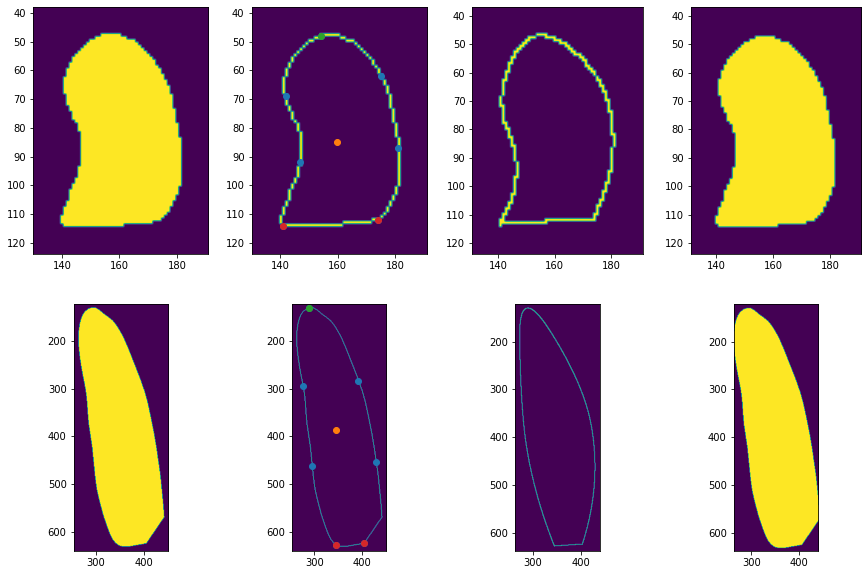

In [5]:
ind = 616
print(ind)
plt.figure(figsize=(15,10))
plt.subplot(241)
plt.imshow(np.squeeze(lv_ekb[ind][1]))
im = area2cont(np.squeeze(lv_ekb[ind][1]))
y, x = np.where(im != 0)
kind='contour'
center=None
num=7
apex_point, base_l_point, base_r_point, cent_x, cent_y = get_main_points(im, space='cart')
base_points = [base_l_point, base_r_point]
print('l', base_l_point)
print('r', base_r_point)
cont_x, cont_y, *_ = get_contour_points(im, base_points=base_points, top_point=apex_point, kind=kind, center=center, num=num)
plt.xlim(min(x)-10, max(x)+10)
plt.ylim(min(y)-10, max(y)+10)
plt.gca().invert_yaxis()

plt.subplot(242)
plt.imshow(im)
plt.scatter(cont_x, cont_y)
plt.scatter(cent_x, cent_y)
plt.scatter(apex_point[0], apex_point[1])
plt.scatter([i[0] for i in base_points], [i[1] for i in base_points])
plt.xlim(min(x)-10, max(x)+10)
plt.ylim(min(y)-10, max(y)+10)
plt.gca().invert_yaxis()

plt.subplot(243)
im_pred = np.zeros(im.shape)
x, y = interpolate_contour(cont_x, cont_y, with_base=True)
im_pred[y,x] = 1
plt.imshow(im_pred)
plt.xlim(min(x)-10, max(x)+10)
plt.ylim(min(y)-10, max(y)+10)
plt.gca().invert_yaxis()

plt.subplot(244)
im = cont2area(im)
plt.imshow(im)
plt.xlim(min(x)-10, max(x)+10)
plt.ylim(min(y)-10, max(y)+10)
plt.gca().invert_yaxis()

plt.subplot(245)
plt.imshow(np.squeeze(lv_camus[ind][1]))


im = area2cont(np.squeeze(lv_camus[ind][1]))
y, x = np.where(im != 0)
apex_point, base_l_point, base_r_point, cent_x, cent_y = get_main_points(im, space='cart')
base_points = [base_l_point, base_r_point]
print('l', base_l_point)
print('r', base_r_point)
cont_x, cont_y, *_ = get_contour_points(im, base_points=base_points, top_point=apex_point, kind=kind, center=center, num=num)
# print(cont_x, cont_y)
plt.xlim(min(x)-10, max(x)+10)
plt.ylim(min(y)-10, max(y)+10)
plt.gca().invert_yaxis()

plt.subplot(246)
plt.imshow(im)
plt.scatter(cont_x, cont_y)
plt.scatter(cent_x, cent_y)
plt.scatter(apex_point[0], apex_point[1])
plt.scatter([i[0] for i in base_points], [i[1] for i in base_points])
plt.xlim(min(x)-10, max(x)+10)
plt.ylim(min(y)-10, max(y)+10)
plt.gca().invert_yaxis()

plt.subplot(247)
im_pred = np.zeros(im.shape)
x, y = interpolate_contour(cont_x, cont_y, with_base=True)
im_pred[y,x] = 1
plt.imshow(im_pred)
plt.xlim(min(x)-10, max(x)+10)
plt.ylim(min(y)-10, max(y)+10)
plt.gca().invert_yaxis()

plt.subplot(248)
im = cont2area(im)
plt.imshow(im)
plt.xlim(min(x)-10, max(x)+10)
plt.ylim(min(y)-10, max(y)+10)
plt.gca().invert_yaxis()

# Построение сигнатуры контура

In [6]:
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', unicode=True)
rc('text.latex', preamble=r'\usepackage[russian]{babel}')

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  This is separate from the ipykernel package so we can avoid doing imports until


## Нормальная сигнатура

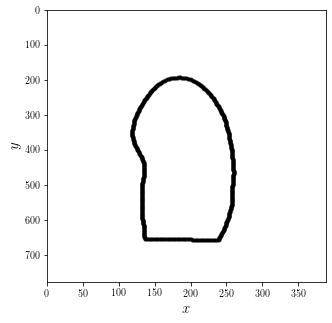

In [7]:
ind = 20
# plt.imshow(lv_camus[ind][1])
im = np.squeeze(lv_camus[ind][1])
cont_y, cont_x = np.where(area2cont(im != 0))
plt.figure(figsize=(5,5))
plt.scatter(cont_x, cont_y, c='k', marker='.', alpha=0.5)
plt.xlim(0, im.shape[1])
plt.ylim(0, im.shape[0])
plt.gca().invert_yaxis()
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
# plt.scatter(np.mean(cont_x), np.mean(cont_y))
plt.savefig('figures/norm_contour.png', dpi =300, bbox_inches='tight', pad_inches=0)

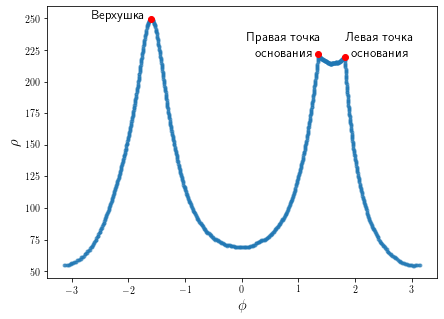

In [8]:
phi, rho = cart2pol(cont_x, cont_y, np.mean(cont_x), np.mean(cont_y))
plt.figure(figsize=(7,5))
plt.scatter(phi, rho, marker='.', alpha=0.5)
plt.xlabel(r'$\phi$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
plt.text(-np.pi+0.5, 250, r'Верхушка', fontsize=13)
index = np.argmax(rho[phi < 0])
plt.scatter(phi[phi < 0][index], rho[phi < 0][index], c='r')
index = np.argmax(rho[phi > np.pi/2])
plt.scatter(phi[phi > np.pi/2][index], rho[phi > np.pi/2][index], c='r')
index = np.argmax(rho[np.bitwise_and(phi < np.pi/2, phi > 0)])
plt.scatter(phi[np.bitwise_and(phi < np.pi/2, phi > 0)][index], rho[np.bitwise_and(phi < np.pi/2, phi > 0)][index], c='r')
plt.text(0.1, 220, r'\begin{center} Правая точка\\ основания \end{center}', fontsize=13)
plt.text(np.pi/2 +0.25, 220, r'\begin{center} Левая точка\\ основания \end{center}', fontsize=13)
plt.savefig('figures/norm_signature.png', dpi =300, bbox_inches='tight', pad_inches=0)

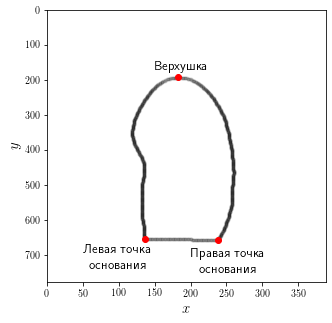

In [23]:
plt.figure(figsize=(5,5))

plt.scatter(cont_x, cont_y, c='k', marker='.', alpha=0.1)
plt.xlim(0, im.shape[1])
plt.ylim(0, im.shape[0])
plt.gca().invert_yaxis()
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
# plt.scatter(np.mean(cont_x), np.mean(cont_y))
index = np.argmax(rho[phi < 0])
x, y = pol2cart(phi[phi < 0][index], rho[phi < 0][index], np.mean(cont_x), np.mean(cont_y))
plt.scatter(x, y, c='r')
index = np.argmax(rho[phi > np.pi/2])
x, y = pol2cart(phi[phi > np.pi/2][index], rho[phi > np.pi/2][index], np.mean(cont_x), np.mean(cont_y))
plt.scatter(x, y, c='r')
index = np.argmax(rho[np.bitwise_and(phi < np.pi/2, phi > 0)])
x, y = pol2cart(phi[np.bitwise_and(phi < np.pi/2, phi > 0)][index], rho[np.bitwise_and(phi < np.pi/2, phi > 0)][index], np.mean(cont_x), np.mean(cont_y))
plt.scatter(x, y, c='r')
plt.text(150, 170, r'Верхушка', fontsize=13)
plt.text(50, 740, r'\begin{center} Левая точка\\ основания \end{center}', fontsize=13)
plt.text(200, 750, r'\begin{center} Правая точка\\ основания \end{center}', fontsize=13)
plt.savefig('figures/norm_contour.png', dpi =300, bbox_inches='tight', pad_inches=0)

## Плохая сигнатура

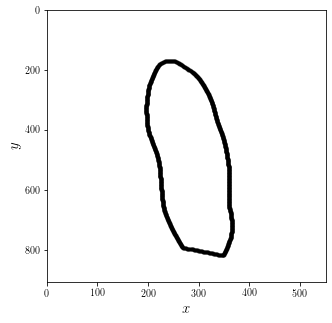

In [21]:
ind = 822
im = area2cont(np.squeeze(lv_camus[ind][1]))
cont_y, cont_x = np.where(im != 0)
plt.figure(figsize=(5,5))
plt.scatter(cont_x, cont_y, c='k', marker='.', alpha=0.5)
plt.xlim(0, im.shape[1])
plt.ylim(0, im.shape[0])
plt.gca().invert_yaxis()
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
# plt.scatter(np.mean(cont_x), np.mean(cont_y))
plt.savefig('figures/bad_contour.png', dpi =300, bbox_inches='tight', pad_inches=0)

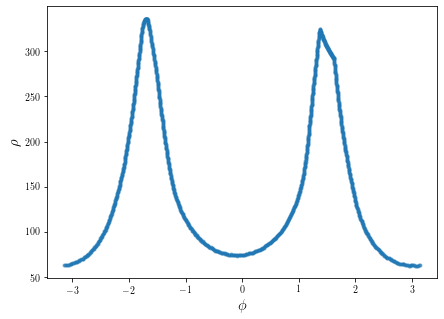

In [22]:
phi, rho = cart2pol(cont_x, cont_y, np.mean(cont_x), np.mean(cont_y))
plt.figure(figsize=(7,5))
plt.scatter(phi, rho, marker='.', alpha=0.5)
plt.xlabel(r'$\phi$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
plt.savefig('figures/bad_signature.png', dpi =300, bbox_inches='tight', pad_inches=0)

## Обозначения на контуре

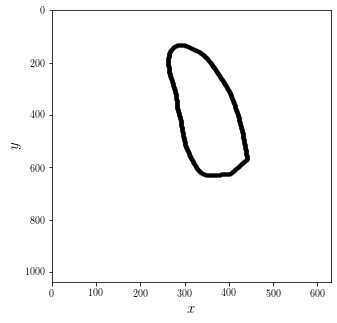

In [23]:
ind = 616
# plt.imshow(lv_camus[ind][1])
im = area2cont(np.squeeze(lv_camus[ind][1]))
cont_y, cont_x = np.where(im != 0)
plt.figure(figsize=(5,5))
plt.scatter(cont_x, cont_y, c='k', marker='.', alpha=0.5)
plt.xlim(0, im.shape[1])
plt.ylim(0, im.shape[0])
plt.gca().invert_yaxis()
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
# plt.scatter(np.mean(cont_x), np.mean(cont_y))
plt.savefig('figures/bad_class_contour.png', dpi =300, bbox_inches='tight', pad_inches=0)

Text(0, 0.5, '$\\rho$')

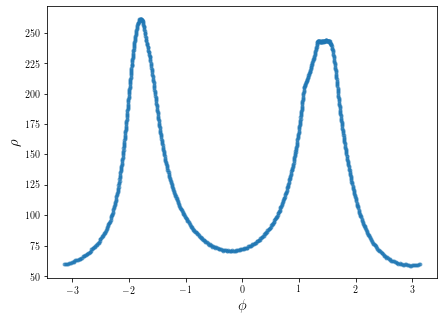

In [24]:
phi, rho = cart2pol(cont_x, cont_y, np.mean(cont_x), np.mean(cont_y))
plt.figure(figsize=(7,5))
plt.scatter(phi, rho, marker='.', alpha=0.5)
plt.xlabel(r'$\phi$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
#plt.savefig('figures/bad_signature.png', dpi =300, bbox_inches='tight', pad_inches=0)

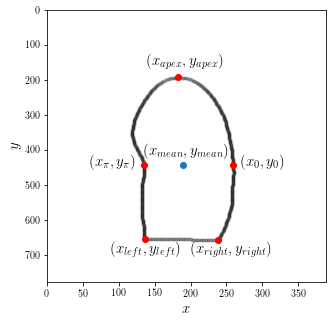

In [25]:
ind = 20
# plt.imshow(lv_camus[ind][1])
im = area2cont(np.squeeze(lv_camus[ind][1]))
cont_y, cont_x = np.where(im != 0)
plt.figure(figsize=(5,5))
plt.scatter(cont_x, cont_y, c='k', marker = '.', alpha=0.1)
plt.xlim(0, im.shape[1])
plt.ylim(0, im.shape[0])
plt.gca().invert_yaxis()
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
plt.scatter(np.mean(cont_x), np.mean(cont_y))
plt.text(135, 420, r'$(x_{mean}, y_{mean})$', fontsize=15)
phi, rho = cart2pol(cont_x, cont_y, np.mean(cont_x), np.mean(cont_y))
index = np.argmax(rho[phi < 0])
x_apex, y_apex = pol2cart(phi[phi < 0][index], rho[phi < 0][index], np.mean(cont_x), np.mean(cont_y))
plt.scatter(x_apex, y_apex, c='r')
plt.text(140, 160, r'$(x_{apex}, y_{apex})$', fontsize=15)
index = np.argmax(rho[phi > np.pi/2])
x_left, y_left = pol2cart(phi[phi > np.pi/2][index], rho[phi > np.pi/2][index], np.mean(cont_x), np.mean(cont_y))
plt.scatter(x_left, y_left, c='r')
plt.text(90, 700, r'$(x_{left}, y_{left})$', fontsize=15)
index = np.argmax(rho[np.bitwise_and(phi > 0, phi < np.pi/2)])
x_right, y_right = pol2cart(phi[np.bitwise_and(phi > 0, phi < np.pi/2)][index], rho[np.bitwise_and(phi > 0, phi < np.pi/2)][index], np.mean(cont_x), np.mean(cont_y))
plt.scatter(x_right, y_right, c='r')
plt.text(200, 700, r'$(x_{right}, y_{right})$', fontsize=15)
# index = np.argmax(rho[np.bitwise_and(phi > 0, phi < np.pi/2)])
x_0, y_0 = pol2cart(phi[np.bitwise_and(phi > -0.01, phi < 0.01)][0], rho[np.bitwise_and(phi > -0.1, phi < 0.1)][0], np.mean(cont_x), np.mean(cont_y))
plt.scatter(x_0, y_0, c='r')
plt.text(270, 450, r'$(x_{0}, y_{0})$', fontsize=15)
x_pi, y_pi = pol2cart(phi[np.bitwise_or(phi > np.pi-0.01, phi < -np.pi+0.01)][0], rho[np.bitwise_or(phi > np.pi-0.01, phi < -np.pi+0.01)][0], np.mean(cont_x), np.mean(cont_y))
plt.scatter(x_pi, y_pi, c='r')
plt.text(60, 450, r'$(x_{\pi}, y_{\pi})$', fontsize=15)
plt.savefig('figures/contour_and_labels.png', dpi = 300, bbox_inches='tight', pad_inches=0)

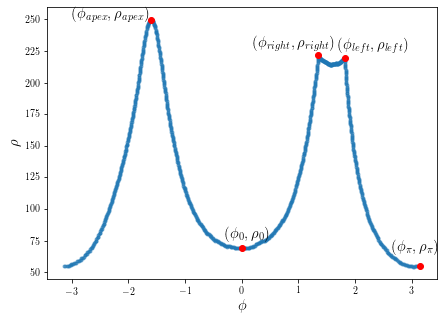

In [26]:
phi, rho = cart2pol(cont_x, cont_y, np.mean(cont_x), np.mean(cont_y))
plt.figure(figsize=(7,5))
plt.scatter(phi, rho, marker = '.', alpha=0.5)
plt.xlabel(r'$\phi$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
index = np.argmax(rho[phi < 0])
phi_apex, rho_apex = phi[phi < 0][index], rho[phi < 0][index]
plt.scatter(phi_apex, rho_apex, c='r')
plt.text(-3.0, 250, r'$(\phi_{apex}, \rho_{apex})$', fontsize=15)
index = np.argmax(rho[phi > np.pi/2])
phi_left, rho_left = phi[phi > np.pi/2][index], rho[phi > np.pi/2][index]
plt.scatter(phi_left, rho_left, c='r')
plt.text(0.2, 227, r'$(\phi_{right}, \rho_{right})$', fontsize=15)
index = np.argmax(rho[np.bitwise_and(phi > 0, phi < np.pi/2)])
phi_right, rho_right = phi[np.bitwise_and(phi > 0, phi < np.pi/2)][index], rho[np.bitwise_and(phi > 0, phi < np.pi/2)][index]
plt.scatter(phi_right, rho_right, c='r')
plt.text(1.7, 225, r'$(\phi_{left}, \rho_{left})$', fontsize=15)
plt.scatter(phi[np.bitwise_and(phi > -0.01, phi < +0.01)][0], rho[np.bitwise_and(phi >-0.01, phi < 0.01)][0], c='r')
plt.text(-.3, 75, r'$(\phi_{0}, \rho_{0})$', fontsize=15)
plt.scatter(phi[np.bitwise_or(phi > np.pi-0.01, phi < -np.pi+0.01)][0], rho[np.bitwise_or(phi > np.pi-0.01, phi < -np.pi+0.01)][0], c='r')
plt.text(2.65, 65, r'$(\phi_{\pi}, \rho_{\pi})$', fontsize=15)
plt.savefig('figures/signature_and_labels.png', dpi =300, bbox_inches='tight', pad_inches=0)

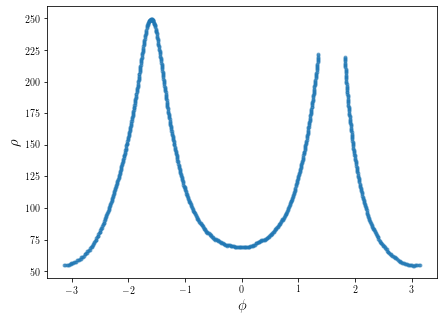

In [27]:
plt.figure(figsize=(7,5))
phi, rho = phi[np.bitwise_or(phi >= phi_left, phi <= phi_right)], rho[np.bitwise_or(phi >= phi_left, phi <= phi_right)]
plt.scatter(phi, rho, marker = '.', alpha=0.5)
plt.xlabel(r'$\phi$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
plt.savefig('figures/signature_without_base.png', dpi =300, bbox_inches='tight', pad_inches=0)

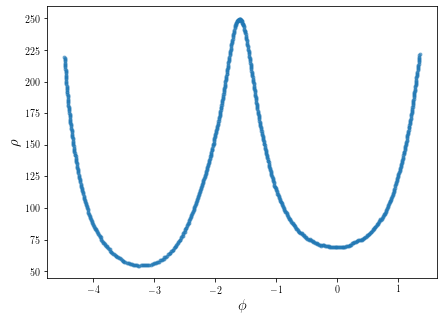

In [28]:
plt.figure(figsize=(7,5))
phi[phi >= phi_left] -= 2*np.pi
phi_left -= 2*np.pi
plt.scatter(phi, rho, marker = '.', alpha=0.5)
plt.xlabel(r'$\phi$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
plt.savefig('figures/signature_shift.png', dpi =300, bbox_inches='tight', pad_inches=0)

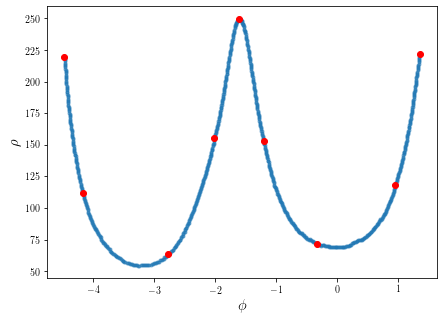

In [29]:
indexes = np.argsort(phi)
phi, rho = phi[indexes], rho[indexes]
num = 9
phi_l =  phi[phi <= phi_apex]
rho_l =  rho[phi <= phi_apex]
phi_r =  phi[phi >= phi_apex]
rho_r =  rho[phi >= phi_apex]

if num % 2:
    cont_phi = np.concatenate((
        np.array([phi_left]),
        phi_l[np.linspace(0, len(phi_l)-1, num // 2 + 1, dtype=int)][1:-1],
        np.array([phi_apex]),
        phi_r[np.linspace(0, len(phi_r)-1, num // 2 + 1, dtype=int)][1:-1],
        np.array([phi_right]),
    ))
    cont_rho = np.concatenate((
        np.array([rho_left]),
        rho_l[np.linspace(0, len(rho_l)-1, num // 2 + 1, dtype=int)][1:-1],
        np.array([rho_apex]),
        rho_r[np.linspace(0, len(rho_r)-1, num // 2 + 1, dtype=int)][1:-1],
        np.array([rho_right]),
    ))
    
plt.figure(figsize=(7,5))
plt.scatter(phi, rho, marker = '.', alpha=0.5)
plt.scatter(cont_phi, cont_rho, c='r')
plt.xlabel(r'$\phi$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
plt.savefig('figures/signature_points.png', dpi =300, bbox_inches='tight', pad_inches=0)

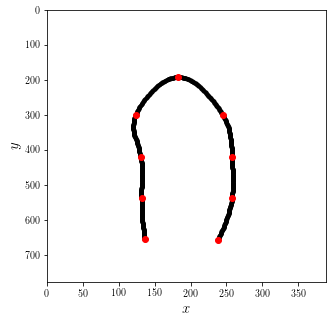

In [30]:
cont_x, cont_y = pol2cart(cont_phi, cont_rho, np.mean(cont_x), np.mean(cont_y))
plt.figure(figsize=(5,5))

plt.xlim(0, im.shape[1])
plt.ylim(0, im.shape[0])
plt.gca().invert_yaxis()
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
cont_x_interp, cont_y_interp = interpolate_contour(cont_x, cont_y, with_base=False)
plt.scatter(cont_x_interp, cont_y_interp, c='k', marker = '.', alpha=0.1)
plt.scatter(cont_x, cont_y, c='r')
plt.savefig('figures/contour_points.png', dpi =300, bbox_inches='tight', pad_inches=0)

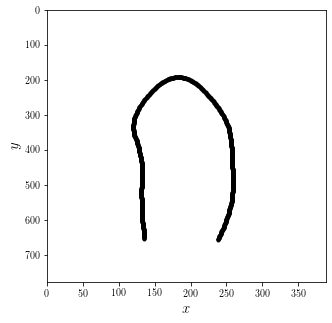

In [19]:

plt.figure(figsize=(5,5))
plt.scatter(cont_x_interp, cont_y_interp, c='k', marker = '.', alpha=0.1)
plt.xlim(0, im.shape[1])
plt.ylim(0, im.shape[0])
plt.gca().invert_yaxis()
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
plt.savefig('figures/contour_without_base.png', dpi =300, bbox_inches='tight', pad_inches=0)

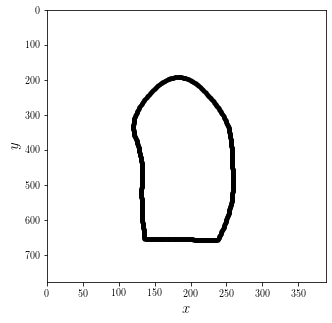

In [20]:
cont_x_interp, cont_y_interp = interpolate_contour(cont_x, cont_y, with_base=True)
plt.figure(figsize=(5,5))
plt.scatter(cont_x_interp, cont_y_interp, c='k', marker = '.', alpha=0.1)
plt.xlim(0, im.shape[1])
plt.ylim(0, im.shape[0])
plt.gca().invert_yaxis()
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$y$', fontsize=15)
plt.savefig('figures/contour_full.png', dpi =300, bbox_inches='tight', pad_inches=0)

# Camus

In [6]:
center = None
kind = 'contour'

In [7]:
list_bases_camus = []
list_tops_camus = []
for ind in tqdm(range(0,len(lv_camus)), total=len(lv_camus)):
    im_area = lv_camus[ind][1]
    im_cont = area2cont(im_area)
    top_point, base_l_point, base_r_point, *_ = get_main_points(im_cont, space='cart')
    if ind == 616:
        base_r_point = (441, 569)
        base_l_point = (403, 624)
    base_points = [base_l_point, base_r_point]
    list_bases_camus.append(base_points)
    list_tops_camus.append(top_point)

In [8]:
dices_camus = {}
jaccards_camus = {}
for num_points in range(3, 22, 2):
    dices = []
    jaccards = []
    for ind in tqdm(range(0,len(lv_camus)), total=len(lv_camus), desc=str(num_points)):
        im_area = lv_camus[ind][1]
        im_cont = area2cont(im_area)
        cont_x, cont_y, *_ = get_contour_points(im_cont, 
                                                base_points=list_bases_camus[ind], 
                                                top_point=list_tops_camus[ind], 
                                                space='cart', 
                                                num=num_points, 
                                                kind=kind, 
                                                center=center)
        im_pred = np.zeros(im_cont.shape)
        x, y = interpolate_contour(cont_x, cont_y, with_base=True)
        im_pred[y,x] = 1
        
        dices.append(dice(im_area, cont2area(im_pred)))
        jaccards.append(jaccard(im_area, cont2area(im_pred)))
        
    dices_camus[num_points] = dices
    jaccards_camus[num_points] = jaccards

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



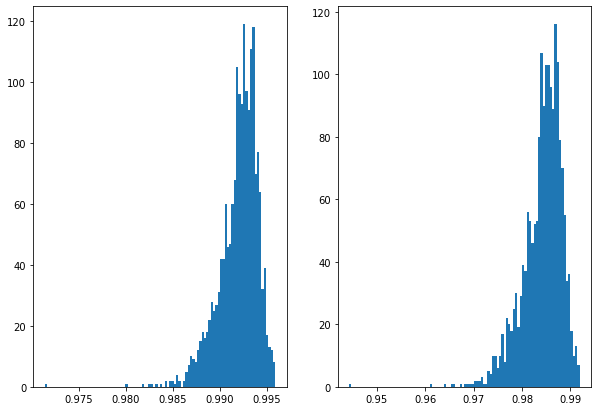

In [9]:
plt.figure(figsize=(10,7))
plt.subplot(121)
plt.hist(dices_camus[21], bins=100);
plt.subplot(122)
plt.hist(jaccards_camus[21], bins=100);

In [10]:
np.argsort(dices_camus[3])[:10]

array([1088,  616,  632, 1083, 1029, 1035,  290,  200, 1668, 1549])

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


0.4388196291487565 0.2810819539765846 1088


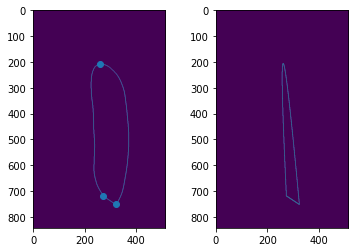

In [14]:
# ind = ind_dices[608]
# ind = bad_indexes[2]
data = lv_camus
ind = 1088
im_area = data[ind][1]
im_cont = area2cont(im_area)
top, base_l_point, base_r_point, *_ = get_main_points(im_cont, space='cart')
base_points = [base_l_point, base_r_point]
cont_x, cont_y, *_ = get_contour_points(im_cont, base_points=list_bases_camus[ind], top_point=list_tops_camus[ind], kind='contour', center=None, num=3)
plt.subplot(121)
plt.imshow(im_cont)
plt.subplot(121)
plt.scatter(cont_x, cont_y)   

local_cont_x, local_cont_y = interpolate_contour(cont_x, cont_y, with_base=True, k=2)
im_pred = np.zeros(im_cont.shape, dtype=bool)
im_pred[local_cont_y.astype(int), local_cont_x.astype(int)] = True
plt.subplot(122)
plt.imshow(im_pred)
im_pred = cont2area(im_pred)

print(dice(im_area, im_pred), jaccard(im_area, im_pred), ind)

In [11]:
writer = csv.writer(open("dice_camus.csv", 'w'), quoting=csv.QUOTE_ALL)
for key in dices_camus.keys():
    writer.writerow(dices_camus[key])
writer = csv.writer(open("jaccard_camus.csv", 'w'), quoting=csv.QUOTE_ALL)
for key in jaccards_camus.keys():
    writer.writerow(jaccards_camus[key])

In [54]:
pd.read_csv("dice_camus.csv", header=None)

,0,1,2,3,4,5,6,7,8,9,...,1790,1791,1792,1793,1794,1795,1796,1797,1798,1799
0,0.670613,0.758048,0.682126,0.777122,0.759190,0.824909,0.700019,0.832869,0.773020,0.824391,...,0.623131,0.734088,0.652485,0.693612,0.748558,0.707002,0.599148,0.859935,0.697951,0.843419
1,0.976637,0.921579,0.887353,0.930803,0.982630,0.946929,0.941141,0.944728,0.934575,0.940606,...,0.901720,0.959530,0.946890,0.955878,0.954394,0.939155,0.956603,0.915198,0.898955,0.908309
2,0.971895,0.965014,0.967556,0.962052,0.989071,0.964044,0.963440,0.969318,0.962711,0.973423,...,0.944979,0.970527,0.956028,0.964921,0.974825,0.971780,0.955910,0.941597,0.975700,0.951993
3,0.978402,0.984790,0.983032,0.982478,0.987519,0.985088,0.982778,0.974961,0.980361,0.978790,...,0.975156,0.981957,0.972461,0.978497,0.983059,0.981585,0.957296,0.976019,0.981101,0.981936
4,0.987859,0.987375,0.985992,0.986424,0.990496,0.989099,0.986927,0.980896,0.985139,0.984787,...,0.984258,0.989173,0.981754,0.981133,0.987043,0.985690,0.972320,0.983435,0.982235,0.986642
5,0.989210,0.989743,0.989265,0.987470,0.992732,0.990504,0.989798,0.984507,0.986236,0.987363,...,0.988668,0.989737,0.986617,0.984393,0.984386,0.989570,0.980248,0.986873,0.985856,0.987007
6,0.991161,0.990120,0.988601,0.991153,0.994048,0.990495,0.991367,0.987630,0.990921,0.990900,...,0.988605,0.990542,0.990385,0.986550,0.988305,0.992112,0.987483,0.989125,0.988203,0.989342
7,0.993037,0.994101,0.990819,0.991240,0.992105,0.992313,0.993304,0.989139,0.990678,0.989407,...,0.993039,0.992314,0.991107,0.989758,0.985845,0.992977,0.987589,0.991548,0.988816,0.989893
8,0.994410,0.992964,0.992487,0.989801,0.991649,0.991305,0.994243,0.989637,0.990657,0.991073,...,0.991167,0.993383,0.993215,0.992954,0.989475,0.992524,0.990839,0.991992,0.987544,0.990837
9,0.994209,0.993297,0.992572,0.992686,0.989453,0.992490,0.994586,0.991420,0.992855,0.991158,...,0.991915,0.994400,0.992453,0.991925,0.989214,0.993875,0.990026,0.991551,0.989660,0.992743


# EKB

In [12]:
center = None
kind = 'contour'

In [13]:
list_bases_ekb = []
list_tops_ekb = []
for ind in tqdm(range(0,len(lv_ekb)), total=len(lv_ekb)):
    im_area = lv_ekb[ind][1]
    im_cont = area2cont(im_area)
    top_point, base_l_point, base_r_point, *_ = get_main_points(im_cont, space='cart')
    base_points = [base_l_point, base_r_point]
    list_bases_ekb.append(base_points)
    list_tops_ekb.append(top_point)

In [14]:
dices_ekb = {}
jaccards_ekb = {}
for num_points in range(3,22,2):
    dices = []
    jaccards = []
    for ind in tqdm(range(0,len(lv_ekb)), total=len(lv_ekb), desc=str(num_points)):
        im_area = lv_ekb[ind][1]
        im_cont = area2cont(im_area)
        cont_x, cont_y, *_ = get_contour_points(im_cont, 
                                                base_points=list_bases_ekb[ind],
                                                top_point=list_tops_ekb[ind], 
                                                space='cart', 
                                                num=num_points, 
                                                kind=kind, 
                                                center=center)
        im_pred = np.zeros(im_cont.shape)
        x, y = interpolate_contour(cont_x, cont_y, with_base=True)
        im_pred[y,x] = 1
        
        dices.append(dice(im_area, cont2area(im_pred)))
        jaccards.append(jaccard(im_area, cont2area(im_pred)))
        
    dices_ekb[num_points] = dices
    jaccards_ekb[num_points] = jaccards

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



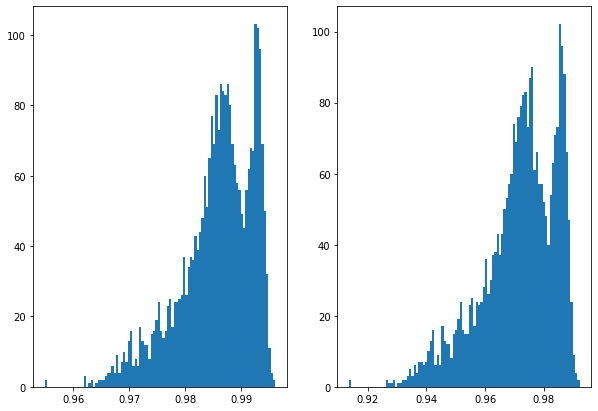

In [15]:
plt.figure(figsize=(10,7))
plt.subplot(121)
plt.hist(dices_ekb[21], bins=100);
plt.subplot(122)
plt.hist(jaccards_ekb[21], bins=100);

In [29]:
np.argsort(dices_ekb[21])[:10]

array([1951,    0, 1387,  595,  292, 1799, 1882, 1772,  478, 1301])

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


0.7762172284644194 0.6342769701606733 1882


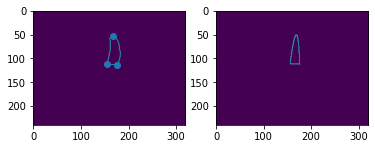

In [35]:
data = lv_ekb
ind = 1882
im_area = data[ind][1]
im_cont = area2cont(im_area)
top, base_l_point, base_r_point, *_ = get_main_points(im_cont, space='cart')
base_points = [base_l_point, base_r_point]
cont_x, cont_y, *_ = get_contour_points(im_cont, base_points=list_bases_ekb[ind], top_point=list_tops_ekb[ind], kind='contour', center=None, num=3)
plt.subplot(121)
plt.imshow(im_cont)
plt.subplot(121)
plt.scatter(cont_x, cont_y)   

local_cont_x, local_cont_y = interpolate_contour(cont_x, cont_y, with_base=True, k=2)
im_pred = np.zeros(im_cont.shape, dtype=bool)
im_pred[local_cont_y.astype(int), local_cont_x.astype(int)] = True
plt.subplot(122)
plt.imshow(im_pred)
im_pred = cont2area(im_pred)

print(dice(im_area, im_pred), jaccard(im_area, im_pred), ind)

In [16]:
writer = csv.writer(open("dice_ekb.csv", 'w'), quoting=csv.QUOTE_ALL)
for key in dices_ekb.keys():
    writer.writerow(dices_ekb[key])
writer = csv.writer(open("jaccard_ekb.csv", 'w'), quoting=csv.QUOTE_ALL)
for key in jaccards_ekb.keys():
    writer.writerow(jaccards_ekb[key])

In [39]:
pd.read_csv("dice_ekb.csv", header=None)

,0,1,2,3,4,5,6,7,8,9,...,2761,2762,2763,2764,2765,2766,2767,2768,2769,2770
0,0.845888,0.831749,0.870606,0.853960,0.731775,0.843719,0.858108,0.877023,0.857420,0.926611,...,0.841448,0.820689,0.834327,0.824086,0.847631,0.870694,0.855578,0.859714,0.837151,0.818845
1,0.847479,0.847982,0.896185,0.891310,0.885204,0.906968,0.883195,0.869984,0.857283,0.893333,...,0.852592,0.845150,0.886854,0.856231,0.857273,0.867458,0.894975,0.873281,0.868190,0.888175
2,0.937693,0.927410,0.965202,0.938536,0.950885,0.969210,0.950825,0.953281,0.939044,0.952676,...,0.924022,0.927147,0.955682,0.943485,0.942837,0.952862,0.968564,0.957107,0.941804,0.957913
3,0.941479,0.944147,0.962764,0.975198,0.950820,0.958880,0.958148,0.955873,0.956076,0.944966,...,0.933402,0.954641,0.959653,0.960159,0.954397,0.950332,0.964630,0.943652,0.972431,0.967477
4,0.960610,0.948602,0.986323,0.983045,0.958004,0.973294,0.967107,0.981550,0.978037,0.967150,...,0.963829,0.966103,0.980663,0.979156,0.967254,0.969922,0.981825,0.964145,0.982093,0.984117
5,0.945844,0.961712,0.977124,0.983460,0.972368,0.984915,0.974556,0.967386,0.972034,0.975403,...,0.969882,0.976493,0.976636,0.974103,0.969392,0.967150,0.978941,0.957476,0.983603,0.986873
6,0.961298,0.972305,0.984988,0.984991,0.979895,0.982325,0.975868,0.982819,0.980859,0.989099,...,0.983803,0.974250,0.982380,0.987253,0.973267,0.975603,0.985944,0.982829,0.988341,0.987980
7,0.956195,0.969583,0.987390,0.984539,0.981987,0.990105,0.972822,0.976544,0.981695,0.986933,...,0.976680,0.979856,0.981918,0.986211,0.978541,0.973827,0.984984,0.978103,0.987074,0.985362
8,0.958955,0.968516,0.988936,0.982045,0.984323,0.988835,0.979528,0.980633,0.985816,0.991605,...,0.984490,0.984543,0.981820,0.990861,0.981603,0.981486,0.987967,0.984602,0.989377,0.987041
9,0.956195,0.973154,0.989422,0.984418,0.983590,0.987794,0.979455,0.978154,0.988795,0.989585,...,0.981281,0.982053,0.982359,0.990217,0.983450,0.979940,0.988652,0.980498,0.988431,0.987347


0.5329457364341085 2112


/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


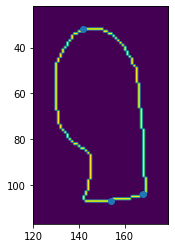

In [29]:
# ind = ind_dices[608]
# ind = bad_indexes[2]
data = lv_ekb
ind = 2112

im_area = data[ind][1]
im_cont = area2cont(im_area)
top, base_l_point, base_r_point, *_ = get_main_points(im_cont, space='cart')
base_points = [base_l_point, base_r_point]
cont_x, cont_y, *_ = get_contour_points(im_cont, base_points=base_points, kind='contour', center=None, num=3)
y, x = np.where(im_cont != 0)
plt.subplot(121)
plt.imshow(im_cont)
plt.subplot(121)
plt.scatter(cont_x, cont_y)
plt.xlim(min(x)-10, max(x)+10)
plt.ylim(min(y)-10, max(y)+10)
plt.gca().invert_yaxis()

local_cont_x, local_cont_y = interpolate_contour(cont_x, cont_y, with_base=True, k=2)
im_pred = np.zeros(im_cont.shape, dtype=bool)
im_pred[local_cont_y.astype(int), local_cont_x.astype(int)] = True

im_pred = cont2area(im_pred)
coef = dice(im_area, im_pred)


print(coef, ind)

# Анализ зависимостей

In [17]:
import pandas as pd
from scipy.optimize import curve_fit

jaccard_ekb = pd.read_csv('jaccard_ekb.csv', header=None)
fs_jaccard_ekb = pd.read_excel('interp_ekb.xlsx', header=None, sheet_name=1)
xs_jaccard_ekb = pd.read_excel('interp_ekb.xlsx', header=None, sheet_name=2)
dice_ekb = pd.read_csv('dice_ekb.csv', header=None)
fs_dice_ekb = pd.read_excel('interp_ekb.xlsx', header=None, sheet_name=3)
xs_dice_ekb = pd.read_excel('interp_ekb.xlsx', header=None, sheet_name=4)

jaccard_camus = pd.read_csv('jaccard_camus.csv', header=None)
fs_jaccard_camus = pd.read_excel('interp_camus.xlsx', header=None, sheet_name=1)
xs_jaccard_camus = pd.read_excel('interp_camus.xlsx', header=None, sheet_name=2)
dice_camus = pd.read_csv('dice_camus.csv', header=None)
fs_dice_camus = pd.read_excel('interp_camus.xlsx', header=None, sheet_name=3)
xs_dice_camus = pd.read_excel('interp_camus.xlsx', header=None, sheet_name=4)

columns = ['3', '5', '7', '9', '11', '13', '15', '17', '19', '21']

jaccard_ekb = jaccard_ekb.T
dice_ekb = dice_ekb.T
jaccard_ekb.columns = columns
dice_ekb.columns = columns

jaccard_camus = jaccard_camus.T
dice_camus = dice_camus.T
jaccard_camus.columns = columns
dice_camus.columns = columns

In [33]:
dist_norm = lambda x : np.exp(- x ** 2 / 2) / (2 * np.pi) ** (1/2) 

def pz_approx(a, h, kernel, nums):
    t = np.linspace(min(a), max(a), nums)
    f = np.zeros(t.shape)
    for i in range(len(t)):
        for j in range(len(a)):
            f[i] += 1 / (len(a) * h) * np.sum(kernel((t[i] - a[j]) / h))
    return f

In [23]:
h_dice_camus = [0.02029, 0.00498, 0.00240, 0.00097, 0.00069, 0.00080, 0.00050, 0.00046, 0.00029, 0.00087]
h_dice_usekb = [0.00999, 0.00188, 0.00170, 0.00087, 0.00089, 0.00086, 0.00070, 0.00076, 0.00064, 0.00047]
h_jaccard_camus = [0.02609, 0.00847, 0.00440, 0.00186, 0.00134, 0.00157, 0.00107, 0.00086, 0.00057, 0.00167]
h_jaccard_usekb = [0.01529, 0.00327, 0.00320, 0.00174, 0.00179, 0.00165, 0.00137, 0.00153, 0.00119, 0.00096]

In [24]:
dice_ekb.to_csv('dice_ekb_new.csv', index=False)
dice_camus.to_csv('dice_camus_new.csv', index=False)
jaccard_ekb.to_csv('jaccard_ekb_new.csv', index=False)
jaccard_camus.to_csv('jaccard_camus_new.csv', index=False)

In [57]:
def get_quartiles(x, a):
    y = np.cumsum(a) / np.sum(a)
    indexes = np.argsort(abs(y - 0.05))[:2]
    q5 = x[indexes][0]
    indexes = np.argsort(abs(y - 0.5))[:2]
    q50 = x[indexes][0]
    indexes = np.argsort(abs(y - 0.95))[:2]
    q95 = x[indexes][0]
    return q5, q50, q95

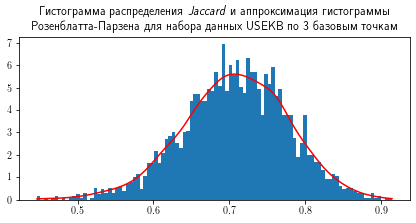

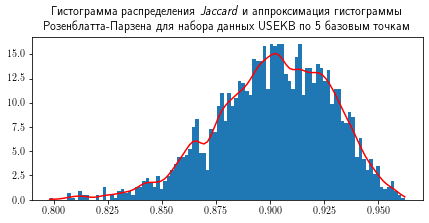

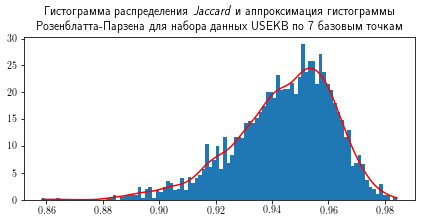

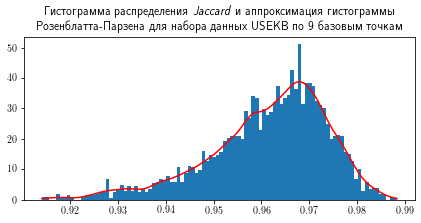

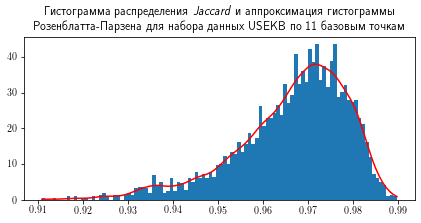

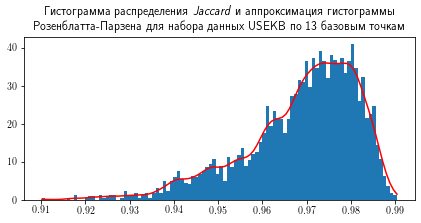

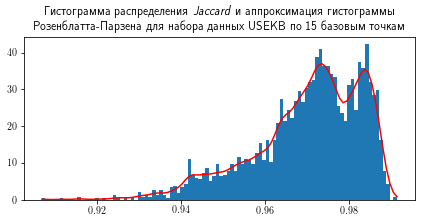

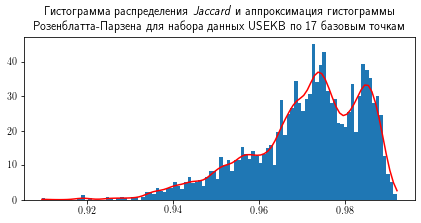

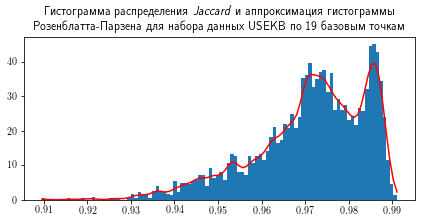

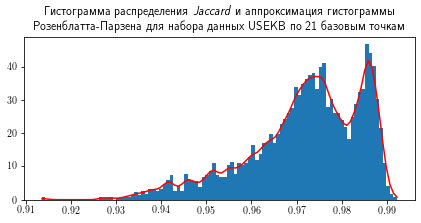

In [59]:
quartiles_jaccard_usekb = {5 : [], 50 : [], 95 : []}
for i, column in enumerate(jaccard_ekb.columns):
    hist, x, *_ = np.histogram(jaccard_ekb[column], bins=100);
    hist = hist / sum(hist) / (x[1] - x[0])
    plt.figure(figsize=(7,3))
    plt.bar([(x[i] + x[i+1]) / 2 for i in range(len(x) - 1)], hist, width=(x[1] - x[0]))
    num_points = 100
    a = np.array(jaccard_ekb[column])
    t = np.linspace(min(a), max(a), num_points)
    f = pz_approx(a, h_jaccard_usekb[i], dist_norm, num_points)
    q5, q50, q95 = get_quartiles(t, f)
    quartiles_jaccard_usekb[5].append(q5)
    quartiles_jaccard_usekb[50].append(q50)
    quartiles_jaccard_usekb[95].append(q95)
    plt.plot(t, f, 'r')
    plt.title(r'\begin{center} Гистограмма распределения \textit{Jaccard} и аппроксимация гистограммы \\ Розенблатта-Парзена для набора данных USEKB по '+  str(2*i + 3)+ ' базовым точкам \end{center}')
    plt.savefig('figures/ekb_jaccard_' + str(2*i + 3) + '.png', dpi =300, bbox_inches='tight', pad_inches=0)

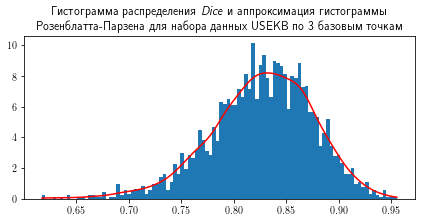

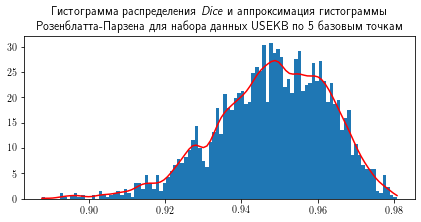

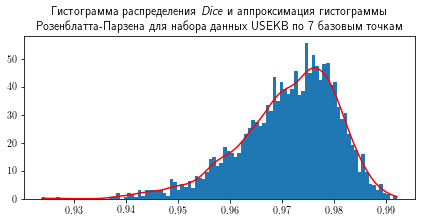

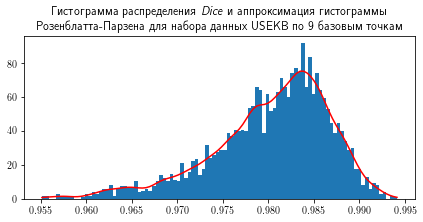

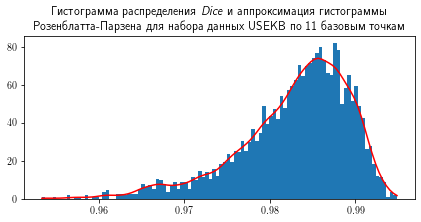

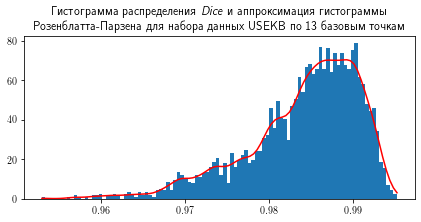

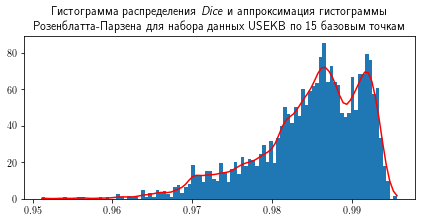

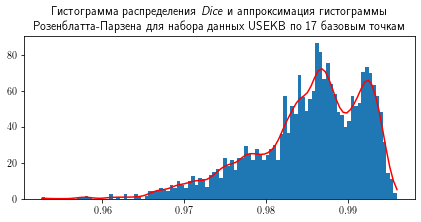

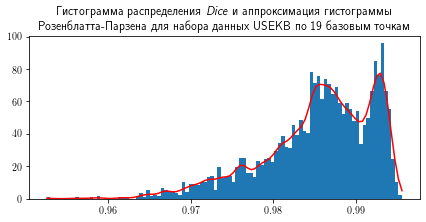

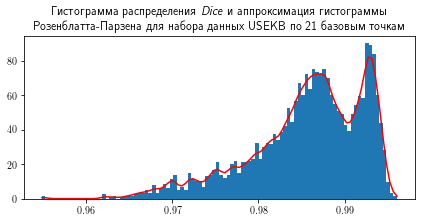

In [60]:
quartiles_dice_usekb = {5 : [], 50 : [], 95 : []}
for i, column in enumerate(dice_ekb.columns):
    hist, x, *_ = np.histogram(dice_ekb[column], bins=100);
    hist = hist / sum(hist) / (x[1] - x[0])
    plt.figure(figsize=(7,3))
    plt.bar([(x[i] + x[i+1]) / 2 for i in range(len(x) - 1)], hist, width=(x[1] - x[0]))
    num_points = 100
    a = np.array(dice_ekb[column])
    t = np.linspace(min(a), max(a), num_points)
    f = pz_approx(a, h_dice_usekb[i], dist_norm, num_points)
    q5, q50, q95 = get_quartiles(t, f)
    quartiles_dice_usekb[5].append(q5)
    quartiles_dice_usekb[50].append(q50)
    quartiles_dice_usekb[95].append(q95)
    plt.plot(t, f, 'r')
    plt.title(r'\begin{center} Гистограмма распределения \textit{Dice} и аппроксимация гистограммы \\ Розенблатта-Парзена для набора данных USEKB по '+  str(2*i + 3)+ ' базовым точкам \end{center}')
    plt.savefig('figures/ekb_dice_' + str(2*i + 3) + '.png', dpi =300, bbox_inches='tight', pad_inches=0)

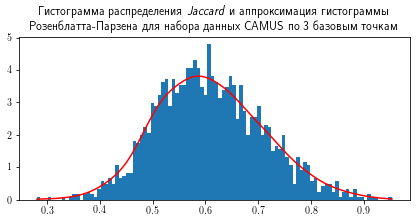

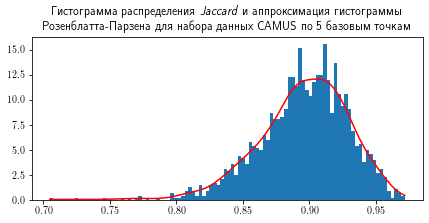

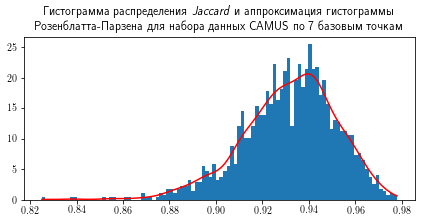

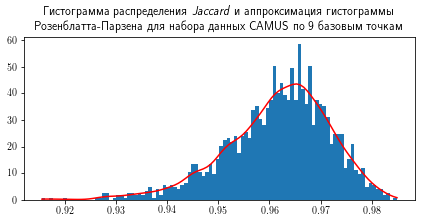

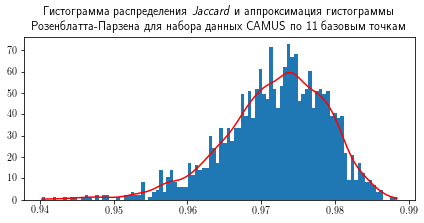

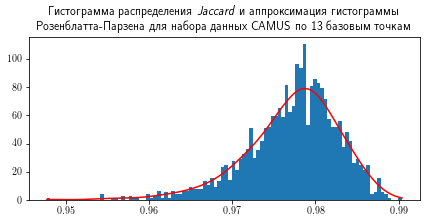

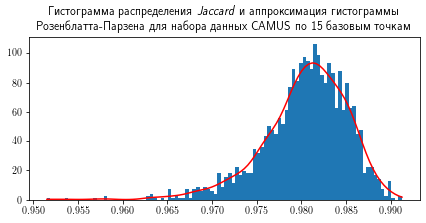

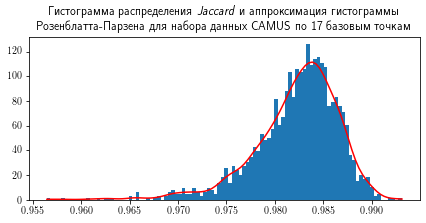

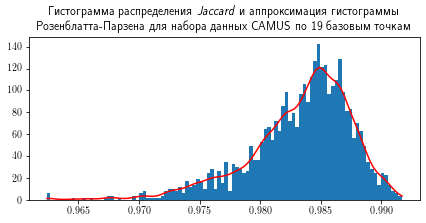

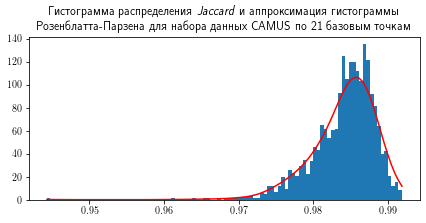

In [61]:
quartiles_jaccard_camus = {5 : [], 50 : [], 95 : []}
for i, column in enumerate(jaccard_camus.columns):
    hist, x, *_ = np.histogram(jaccard_camus[column], bins=100);
    hist = hist / sum(hist) / (x[1] - x[0])
    plt.figure(figsize=(7,3))
    plt.bar([(x[i] + x[i+1]) / 2 for i in range(len(x) - 1)], hist, width=(x[1] - x[0]))
    num_points = 100
    a = np.array(jaccard_camus[column])
    t = np.linspace(min(a), max(a), num_points)
    f = pz_approx(a, h_jaccard_camus[i], dist_norm, num_points)
    q5, q50, q95 = get_quartiles(t, f)
    quartiles_jaccard_camus[5].append(q5)
    quartiles_jaccard_camus[50].append(q50)
    quartiles_jaccard_camus[95].append(q95)
    plt.plot(t, f, 'r')
    plt.title(r'\begin{center} Гистограмма распределения \textit{Jaccard} и аппроксимация гистограммы \\ Розенблатта-Парзена для набора данных CAMUS по '+  str(2*i + 3)+ ' базовым точкам \end{center}')
    plt.savefig('figures/camus_jaccard_' + str(2*i + 3) + '.png', dpi =300, bbox_inches='tight', pad_inches=0)

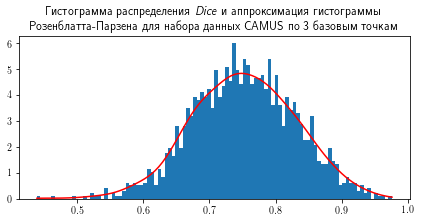

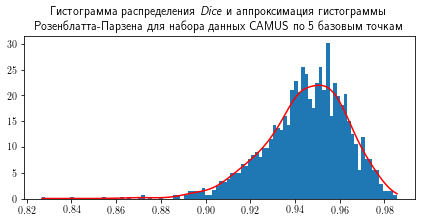

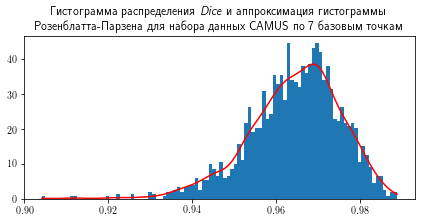

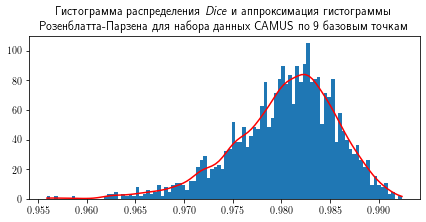

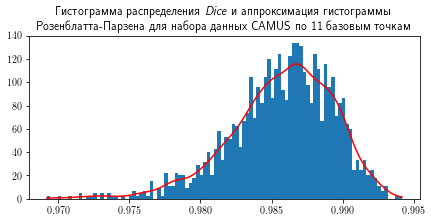

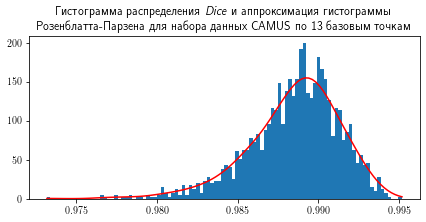

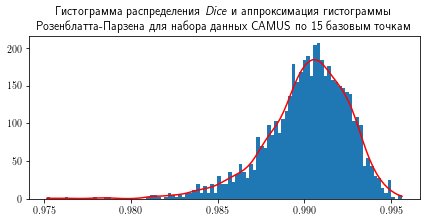

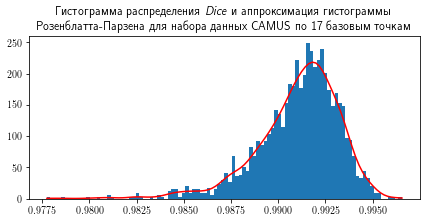

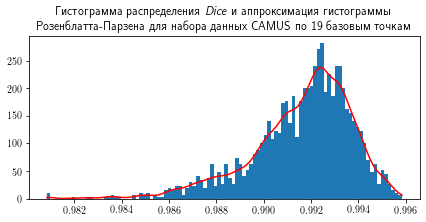

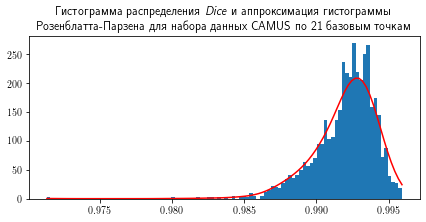

In [62]:
quartiles_dice_camus = {5 : [], 50 : [], 95 : []}
for i, column in enumerate(dice_camus.columns):
    hist, x, *_ = np.histogram(dice_camus[column], bins=100);
    hist = hist / sum(hist) / (x[1] - x[0])
    plt.figure(figsize=(7,3))
    plt.bar([(x[i] + x[i+1]) / 2 for i in range(len(x) - 1)], hist, width=(x[1] - x[0]))
    num_points = 100
    a = np.array(dice_camus[column])
    t = np.linspace(min(a), max(a), num_points)
    f = pz_approx(a, h_dice_camus[i], dist_norm, num_points)
    q5, q50, q95 = get_quartiles(t, f)
    quartiles_dice_camus[5].append(q5)
    quartiles_dice_camus[50].append(q50)
    quartiles_dice_camus[95].append(q95)
    plt.plot(np.linspace(min(a), max(a), num_points), f, 'r')
    plt.title(r'\begin{center} Гистограмма распределения \textit{Dice} и аппроксимация гистограммы \\ Розенблатта-Парзена для набора данных CAMUS по '+  str(2*i + 3)+ ' базовым точкам \end{center}')
    plt.savefig('figures/camus_dice_' + str(2*i + 3) + '.png', dpi =300, bbox_inches='tight', pad_inches=0)

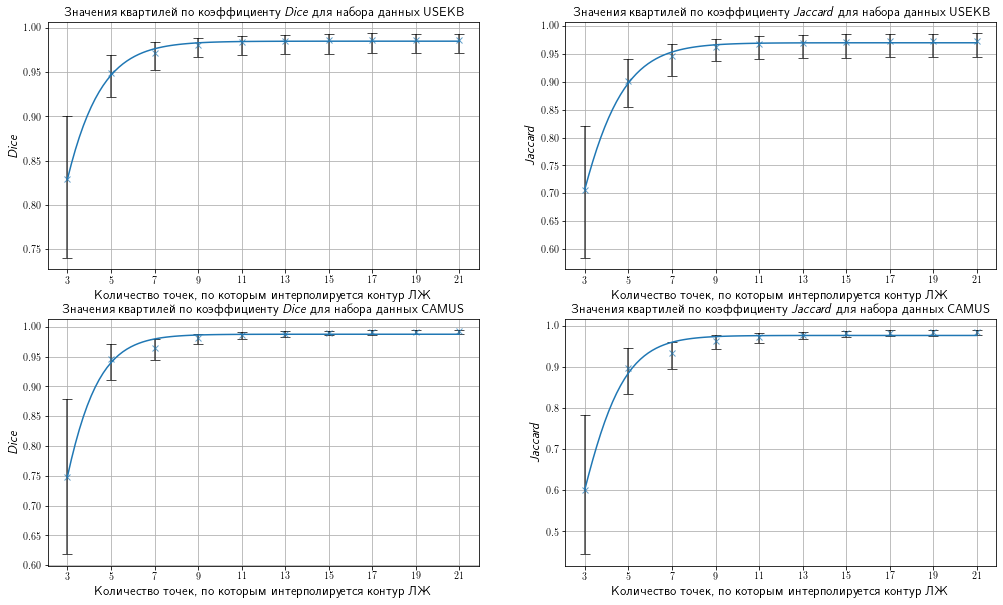

In [70]:
import pandas as pd
from scipy.optimize import curve_fit

# dfs_ekb = pd.read_excel('rp_ekb.xlsx', sheet_name=0)
# dfs_camus = pd.read_excel('rp_camus.xlsx', sheet_name=0)

def func(t, A, h, b, l):
    return 1 / (l + A * np.exp(h*t + b))

# popt, pcov = curve_fit(func, n_points, ekb_dice_quart_50, (0, 0.5, 1, 1), maxfev=10**8)    
# A, h, b, l = popt

# print('A={0}\nh={1}\nb={2}\nl={3}'.format(*tuple(popt)))

# plt.scatter(n_points, ekb_dice_quart_50, s=30, color='orange')
# plt.plot(np.linspace(3,21,100), func(np.linspace(3,21,100), *popt))

n_points = np.arange(3, 22, 2)
ekb_dice_quart_5 = np.array(quartiles_dice_usekb[5])
ekb_dice_quart_50 = np.array(quartiles_dice_usekb[50])
ekb_dice_quart_95 = np.array(quartiles_dice_usekb[95])
ekb_jaccard_quart_5 = np.array(quartiles_jaccard_usekb[5])
ekb_jaccard_quart_50 = np.array(quartiles_jaccard_usekb[50])
ekb_jaccard_quart_95 = np.array(quartiles_jaccard_usekb[95])
camus_dice_quart_5 = np.array(quartiles_dice_camus[5])
camus_dice_quart_50 = np.array(quartiles_dice_camus[50])
camus_dice_quart_95 = np.array(quartiles_dice_camus[95])
camus_jaccard_quart_5 = np.array(quartiles_jaccard_camus[5])
camus_jaccard_quart_50 = np.array(quartiles_jaccard_camus[50])
camus_jaccard_quart_95 = np.array(quartiles_jaccard_camus[95])
plt.figure(figsize=(17,10))
plt.subplot(221)
plt.errorbar(n_points, 
             ekb_dice_quart_50, 
             yerr=np.concatenate((np.expand_dims(ekb_dice_quart_50 - ekb_dice_quart_5, axis=0), 
                                  np.expand_dims(ekb_dice_quart_95 - ekb_dice_quart_50, axis=0)), axis=0),
             alpha=0.7,
             ecolor='black',
             capsize=5,
             marker='x',
             ls=''
            )
# plt.scatter(n_points, ekb_dice_quart_5)
popt, pcov = curve_fit(func, n_points, ekb_dice_quart_50, (0.1, 0.5, 1, 1), maxfev=10**6)
plt.plot(np.linspace(3,21,100), func(np.linspace(3,21,100), *popt))
plt.xticks(n_points);
plt.grid('on')
plt.xlabel(r'Количество точек, по которым интерполируется контур ЛЖ', fontsize=13)
plt.ylabel(r'\textit{Dice}', fontsize=13)
plt.title(r'Значения квартилей по коэффициенту \textit{Dice} для набора данных USEKB', fontsize=13)
plt.subplot(222)
plt.errorbar(n_points, 
             ekb_jaccard_quart_50, 
             yerr=np.concatenate((np.expand_dims(ekb_jaccard_quart_50 - ekb_jaccard_quart_5, axis=0), 
                                  np.expand_dims(ekb_jaccard_quart_95 - ekb_jaccard_quart_50, axis=0)), axis=0),
             alpha=0.7,
             ecolor='black',
             capsize=5,
             marker='x',
             ls=''
            )
popt, pcov = curve_fit(func, n_points, ekb_jaccard_quart_50, (0.1, 0.5, 1, 1), maxfev=10**6)
plt.plot(np.linspace(3,21,100), func(np.linspace(3,21,100), *popt))
plt.xticks(n_points);
plt.grid('on')
plt.xlabel(r'Количество точек, по которым интерполируется контур ЛЖ', fontsize=13)
plt.ylabel(r'\textit{Jaccard}', fontsize=13)
plt.title(r'Значения квартилей по коэффициенту \textit{Jaccard} для набора данных USEKB', fontsize=13)
plt.subplot(223)
plt.errorbar(n_points, 
             camus_dice_quart_50, 
             yerr=np.concatenate((np.expand_dims(camus_dice_quart_50 - camus_dice_quart_5, axis=0), 
                                  np.expand_dims(camus_dice_quart_95 - camus_dice_quart_50, axis=0)), axis=0),
             alpha=0.7,
             ecolor='black',
             capsize=5,
             marker='x',
             ls=''
            )
popt, pcov = curve_fit(func, n_points, camus_dice_quart_50, (0.1, 0.5, 1, 1), maxfev=10**6)
plt.plot(np.linspace(3,21,100), func(np.linspace(3,21,100), *popt))
plt.xticks(n_points);
plt.grid('on')
plt.xlabel(r'Количество точек, по которым интерполируется контур ЛЖ', fontsize=13)
plt.ylabel(r'\textit{Dice}', fontsize=13)
plt.title(r'Значения квартилей по коэффициенту \textit{Dice} для набора данных CAMUS', fontsize=13)
plt.subplot(224)
plt.errorbar(n_points, 
             camus_jaccard_quart_50, 
             yerr=np.concatenate((np.expand_dims(camus_jaccard_quart_50 - camus_jaccard_quart_5, axis=0), 
                                  np.expand_dims(camus_jaccard_quart_95 - camus_jaccard_quart_50, axis=0)), axis=0),
             alpha=0.7,
             ecolor='black',
             capsize=5,
             marker='x',
             ls=''
            )
popt, pcov = curve_fit(func, n_points, camus_jaccard_quart_50, (0.1, 0.5, 1, 1), maxfev=10**6)
plt.plot(np.linspace(3,21,100), func(np.linspace(3,21,100), *popt))
plt.xticks(n_points);
plt.grid('on')
plt.xlabel(r'Количество точек, по которым интерполируется контур ЛЖ', fontsize=13)
plt.ylabel(r'\textit{Jaccard}', fontsize=13)
plt.title(r'Значения квартилей по коэффициенту \textit{Jaccard} для набора данных CAMUS', fontsize=13)
plt.savefig('figures/quartiles_graphics.png', dpi =300, bbox_inches='tight', pad_inches=0)

In [64]:
print(ekb_dice_quart_50[3])
print(ekb_jaccard_quart_50[3])
print(camus_dice_quart_50[3])
print(camus_jaccard_quart_50[3])

0.981136667826923
0.9628532311995849
0.9809813256448262
0.9625061241422528


In [65]:
print((ekb_dice_quart_50[3] - camus_dice_quart_50[3]) / camus_dice_quart_50[3])
print((ekb_dice_quart_50[3] - camus_dice_quart_50[3]) / ekb_dice_quart_50[3])
print((ekb_jaccard_quart_50[3] - camus_jaccard_quart_50[3]) / camus_jaccard_quart_50[3])
print((ekb_jaccard_quart_50[3] - camus_jaccard_quart_50[3]) / ekb_jaccard_quart_50[3])

0.00015835386264328134
0.00015832879066771146
0.0003606284143297527
0.00036049840836037725


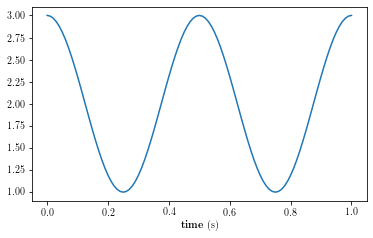

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Example data
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(4 * np.pi * t) + 2

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(t, s)

plt.xlabel(r'\textbf{time} (s)')
# plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
# plt.title(r"\TeX\ is Number "
#           r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!",
#           fontsize=16, color='gray')
# Make room for the ridiculously large title.
plt.subplots_adjust(top=0.8)